23
2.2487748498162864e-42
10000


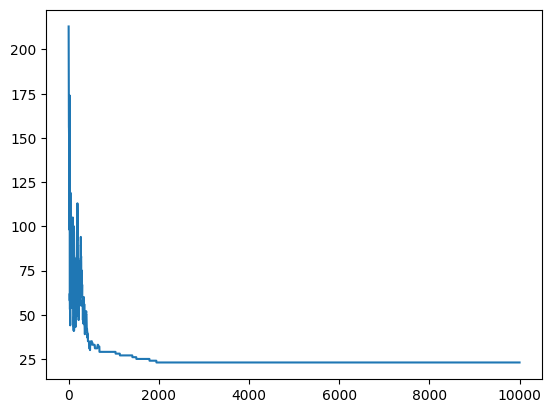

28.7  34.663966
Cmax_x: 23
  Task: Machine 1, Start: 0, End: 5, Resource: J7, Label: $O_{7,1}$, Info: J7
  Task: Machine 1, Start: 7, End: 8, Resource: J10, Label: $O_{10,3}$, Info: J10
  Task: Machine 1, Start: 13, End: 15, Resource: J5, Label: $O_{5,2}$, Info: J5
  Task: Machine 1, Start: 15, End: 18, Resource: J6, Label: $O_{6,3}$, Info: J6
  Task: Machine 1, Start: 18, End: 20, Resource: J2, Label: $O_{2,2}$, Info: J2
  Task: Machine 1, Start: 20, End: 21, Resource: J4, Label: $O_{4,3}$, Info: J4
  Task: Machine 2, Start: 0, End: 4, Resource: J10, Label: $O_{10,1}$, Info: J10
  Task: Machine 2, Start: 5, End: 10, Resource: J7, Label: $O_{7,2}$, Info: J7
  Task: Machine 2, Start: 14, End: 16, Resource: J9, Label: $O_{9,2}$, Info: J9
  Task: Machine 2, Start: 19, End: 21, Resource: J3, Label: $O_{3,3}$, Info: J3
  Task: Machine 2, Start: 21, End: 23, Resource: J8, Label: $O_{8,3}$, Info: J8
  Task: Machine 3, Start: 0, End: 4, Resource: J6, Label: $O_{6,1}$, Info: J6
  Task: Machine 

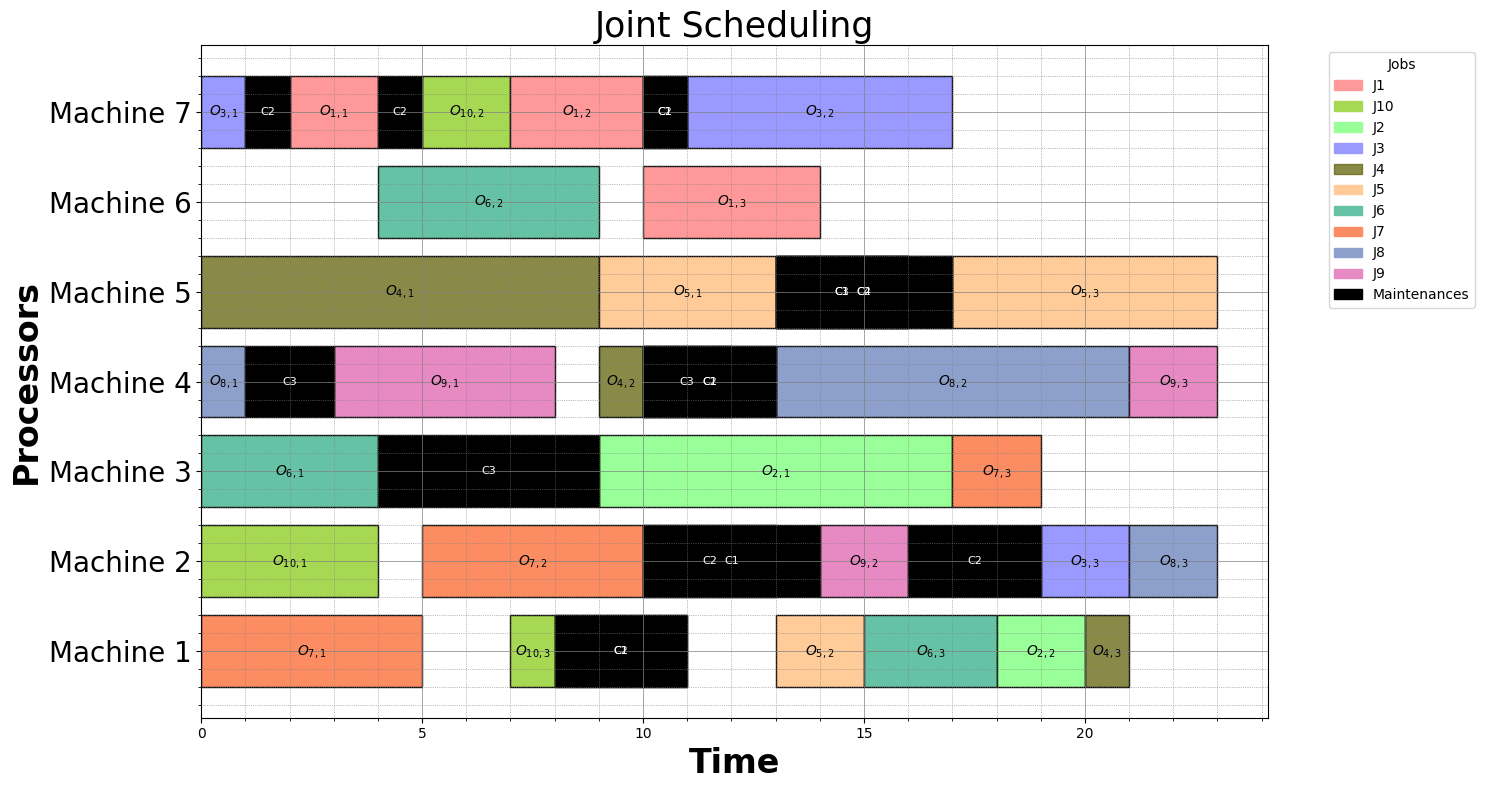

In [1]:
from RecuitSimuleCS import *
from fonctions.data import Data
from fonctions.CommonFunctions import *

import random
import math
import matplotlib.pyplot as plt
from PIL import Image
import time 
from fonctions.diagram import *
from fonctions.Save_Read_JSON import *

lambdaPM = [0.8]
mu = [0]
PM_time = [0]

nbJobs, nbMachines, nbOperationsParJob, dureeOperations, processingTimes = parse_operations_file(f"TESTS/k2/k2.txt")
_, _, nbComposants, seuils_degradation, dureeMaintenances, degradations, degradations2 = parse_degradations_file(f"TESTS/k2/instance01/instance.txt")


data = Data(nbJobs, nbMachines, nbComposants, seuils_degradation, dureeMaintenances, degradations, degradations2, nbOperationsParJob, dureeOperations, processingTimes)
#print(repr(data))

tempInit=100
tempFin=0
coolRate=0.99
iters=10000

rscs=RSCS(data)
best_solution, best_energy, total_execution_time = rscs.Run_RSCS(tempInit,tempFin,coolRate,iters,objweights)
save_JSON(data,best_solution,"testk2_inst1.json")
print(f"{best_energy}  {total_execution_time}")

result = lire_fichier_json(f"testk2_inst1.json")
plotGantt(result, "testk2_inst1_figure", showgantt=True)


In [2]:
print("\nDetailed representation (__repr__):")
print(repr(data))


Detailed representation (__repr__):
Data(nbJobs=10, nbMachines=7) 

Machine   Number of Components     Degradation Thresholds   Maintenance duration     
--------------------------------------------------------------------------------
M1        2                        [9, 10]                  [3, 3]                   
M2        2                        [10, 6]                  [4, 3]                   
M3        3                        [7, 12, 5]               [3, 5, 5]                
M4        3                        [11, 9, 6]               [3, 3, 2]                
M5        4                        [5, 10, 7, 5]            [3, 4, 3, 4]             
M6        1                        [11]                     [4]                      
M7        2                        [11, 7]                  [1, 1]                   


Job       Operation (Machine, Duration)(Component degradation)  
----------------------------------------
J1          Op 1     M1        1       (C1,9) (C2,7) 


In [10]:
pip install taguchi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import numpy as np
import pandas as pd

# Define the L25 orthogonal array (25 rows, 3 columns for parameters)
l25_array = [
    [1, 1, 1],
    [1, 2, 2],
    [1, 3, 3],
    [1, 4, 4],
    [1, 5, 5],
    [2, 1, 2],
    [2, 2, 3],
    [2, 3, 4],
    [2, 4, 5],
    [2, 5, 1],
    [3, 1, 3],
    [3, 2, 4],
    [3, 3, 5],
    [3, 4, 1],
    [3, 5, 2],
    [4, 1, 4],
    [4, 2, 5],
    [4, 3, 1],
    [4, 4, 2],
    [4, 5, 3],
    [5, 1, 5],
    [5, 2, 1],
    [5, 3, 2],
    [5, 4, 3],
    [5, 5, 4]
]

# Convert to a Pandas DataFrame for better visualization
columns = ['Parameter 1', 'Parameter 2', 'Parameter 3']
df = pd.DataFrame(l25_array, columns=columns)

# Display the array
#print(df)

# Example: Assign specific levels to each parameter (optional)
parameter_1_levels = [0.1, 0.2, 0.5, 0.8, 0.9]
parameter_2_levels = parameter_1_levels
parameter_3_levels = parameter_1_levels

# Map numerical levels to actual values
df['Parameter 1'] = df['Parameter 1'].map(lambda x: parameter_1_levels[x-1])
df['Parameter 2'] = df['Parameter 2'].map(lambda x: parameter_2_levels[x-1])
df['Parameter 3'] = df['Parameter 3'].map(lambda x: parameter_3_levels[x-1])


# Normalize rows to sum to C
row_sums = df.sum(axis=1).values.reshape(-1, 1)
df1=round(df / row_sums,1)
for i in range(1,len(df1)):
    #print(df1['Parameter 1'])
    df1['Parameter 1'][i]=1-df1['Parameter 2'][i]-df1['Parameter 3'][i]
df2 =  df1.drop_duplicates()

# Display the mapped DataFrame
print("\nL25 Orthogonal Array with Mapped Levels:")
#print(df)
print(df2)


L25 Orthogonal Array with Mapped Levels:
    Parameter 1  Parameter 2  Parameter 3
0           0.3          0.3          0.3
1           0.2          0.4          0.4
2           0.0          0.5          0.5
5           0.4          0.2          0.4
6           0.2          0.2          0.6
7           0.2          0.3          0.5
8           0.1          0.4          0.5
9           0.2          0.7          0.1
10          0.4          0.1          0.5
13          0.3          0.6          0.1
17          0.5          0.4          0.1
19          0.4          0.4          0.2
21          0.7          0.2          0.1
22          0.6          0.3          0.1
24          0.4          0.3          0.3


22 , 2.2487748498162864e-42 , 10000


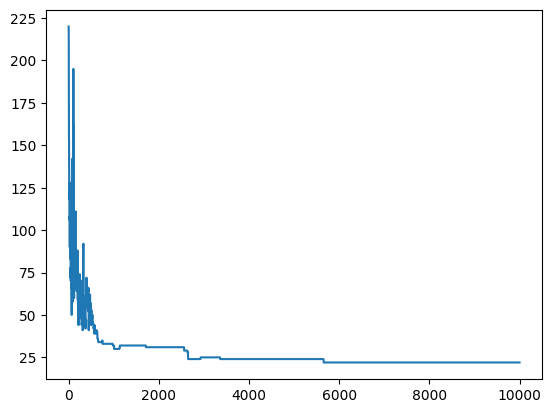

[0.3, 0.3, 0.3, 25.199999999999996, 62, 0, 19.630733599999985]
28 , 2.2487748498162864e-42 , 10000


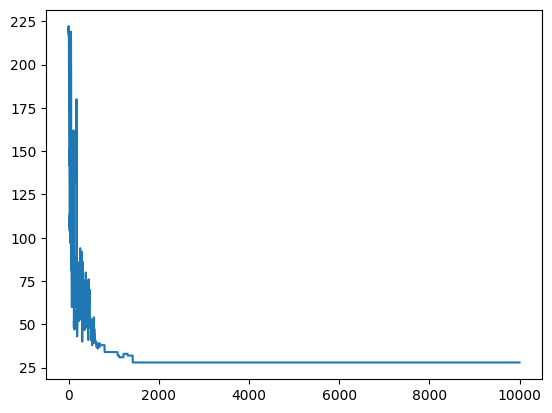

[0.19999999999999996, 0.4, 0.4, 29.2, 59, 0, 21.751938199999927]
175 , 2.2487748498162864e-42 , 10000


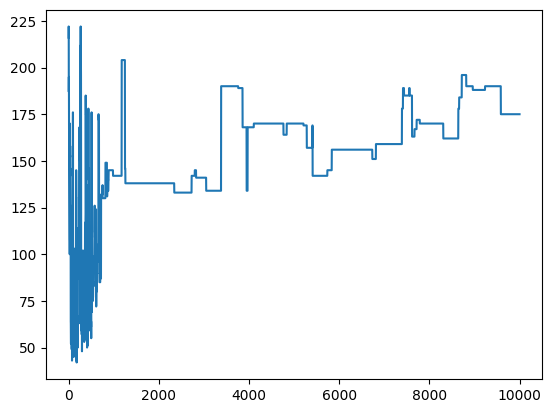

[0.0, 0.5, 0.5, 11.0, 22, 0, 23.147393100000045]


KeyError: 3

In [6]:
from RecuitSimuleCS import *
from fonctions.data import Data
from fonctions.CommonFunctions import *

import random
import math
import matplotlib.pyplot as plt
from PIL import Image
import time 
from fonctions.diagram import *
from fonctions.Save_Read_JSON import *

lambdaPM = [0.8]
mu = [0]
PM_time = [0]

nbJobs, nbMachines, nbOperationsParJob, dureeOperations, processingTimes = parse_operations_file(f"TESTS/k2/k2.txt")
_, _, nbComposants, seuils_degradation, dureeMaintenances, degradations, degradations2 = parse_degradations_file(f"TESTS/k2/instance01/instance.txt")


data = Data(nbJobs, nbMachines, nbComposants, seuils_degradation, dureeMaintenances, degradations, degradations2, nbOperationsParJob, dureeOperations, processingTimes)
#print(repr(data))


tempInit=100
tempFin=0
coolRate=0.99
iters=10000
ResTest=[]


rscs=RSCS(data)
for i in range(len(df2)):
    #print([df2['Parameter 1'][i],df2['Parameter 2'][i],df2['Parameter 3'][i]])
    optsolution, optCmax, cputime,nbrmaint,qualpenal=rscs.Run_RSCS(tempInit,tempFin,coolRate,iters,[df2['Parameter 1'][i],df2['Parameter 2'][i],df2['Parameter 3'][i]],True)
    print([df2['Parameter 1'][i],df2['Parameter 2'][i],df2['Parameter 3'][i],optCmax, nbrmaint, qualpenal,cputime])
    ResTest.append([df2['Parameter 1'][i],df2['Parameter 2'][i],df2['Parameter 3'][i],optCmax, nbrmaint, qualpenal,cputime])
df=pd.DataFrame(ResTest)
df.to_excel('ResPlanExp.xlsx', index=False, header=False)



In [8]:
orthogonal_array = np.array([
    [1, 2, 3],
    [4, 5, 1],
    [3, 2, 1],
    [5, 4, 3],
    [1, 3, 2]
])

# Desired constant sum
C = 10

# Normalize rows to sum to C
normalized_array = orthogonal_array / orthogonal_array.sum(axis=1, keepdims=True) * C

print("Normalized Orthogonal Array:")
print(normalized_array)

Normalized Orthogonal Array:
[[1.66666667 3.33333333 5.        ]
 [4.         5.         1.        ]
 [5.         3.33333333 1.66666667]
 [4.16666667 3.33333333 2.5       ]
 [1.66666667 5.         3.33333333]]
